In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=666)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
knn_parameters= {
    'n_neighbors':[3,5,7,9,11,15,25],
    'weights': ['uniform','distance'],
    'p':[1,2,3,4]

}

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid=knn_parameters, n_jobs=-1)

In [9]:
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 15, 25],
                         'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [10]:
grid_search.best_score_

0.96875

In [11]:
grid_search.best_params_

{'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}

In [12]:
best_knn= grid_search.best_estimator_

In [13]:
import joblib

In [14]:
joblib.dump(best_knn,'rara chachau chau.pkl')

['rara chachau chau.pkl']

In [15]:
loaded_knn = joblib.load('rara chachau chau.pkl')

In [16]:
from mlxtend.plotting import plot_decision_regions

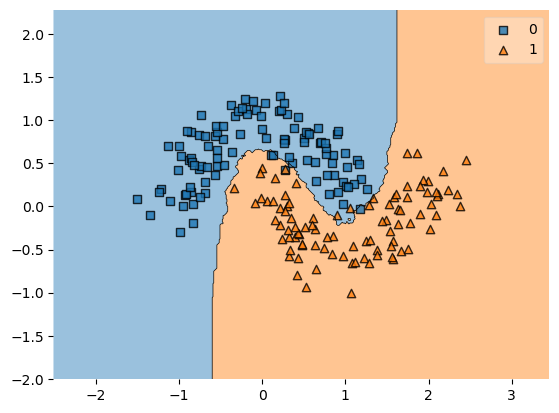

In [17]:
plot_decision_regions(X_test,y_test, loaded_knn)
plt.show()

In [18]:
y_pred =loaded_knn.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,confusion_matrix

In [20]:
conf_mat= confusion_matrix(y_test,y_pred)
conf_mat

array([[103,   4],
       [  3,  90]], dtype=int64)

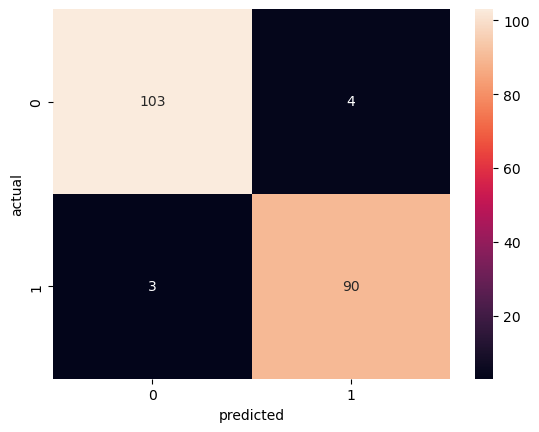

In [21]:
sns.heatmap(conf_mat, annot=True, fmt='.3g')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()